In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date 


#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#取消警告
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('dataset\Aquifer\Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
#在第一个Rainfall数据出现以前，仅有Depth_to_Groundwater_P24和Depth_to_Groundwater_P25以及少量的Temperature_Petrignano的数据
df1 = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [4]:
#将 "Date" 列设置为索引，并将其转换为 DateTime 类型
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [5]:
#去掉没有用的
df1=df1.drop(['Temperature_Petrignano'], axis=1)

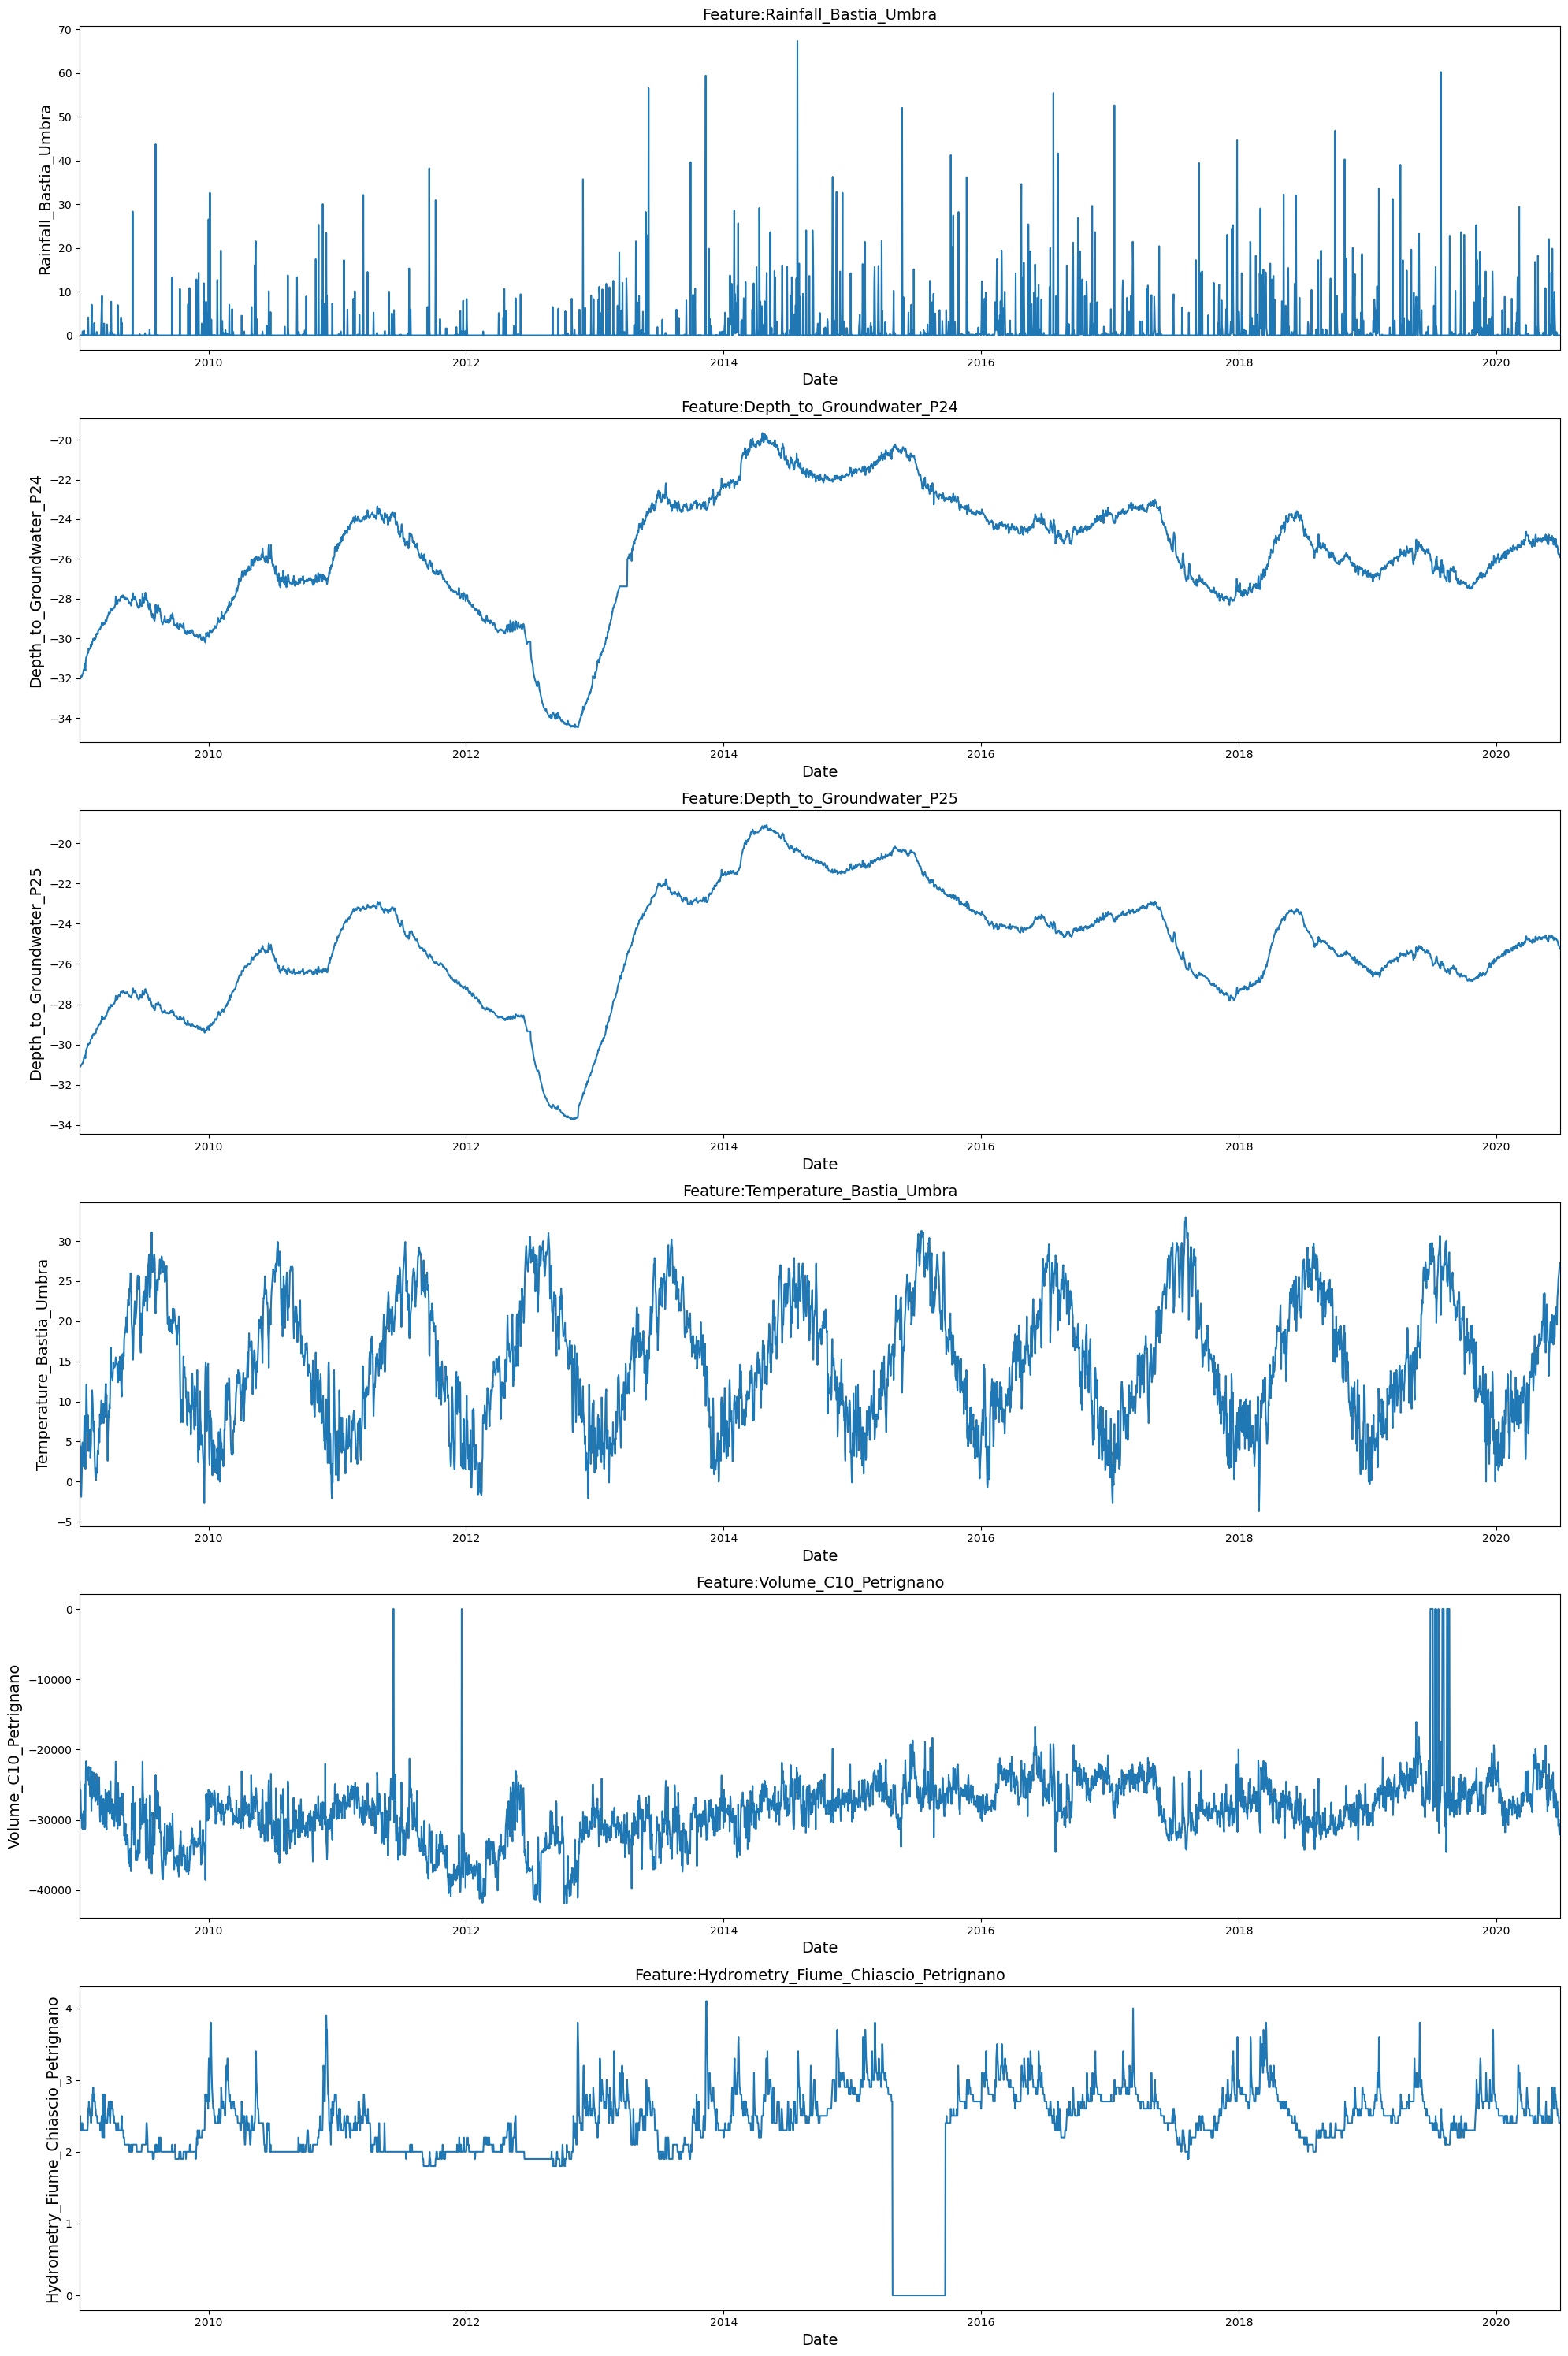

In [6]:
#出去日期有六列数据
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y,并且对其中缺失的数据用前一个数据进行填充
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column].fillna(method='ffill'),ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()
    
    

    

In [7]:
#统计缺失值的数量
df1.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

(14245.0, 18443.0)

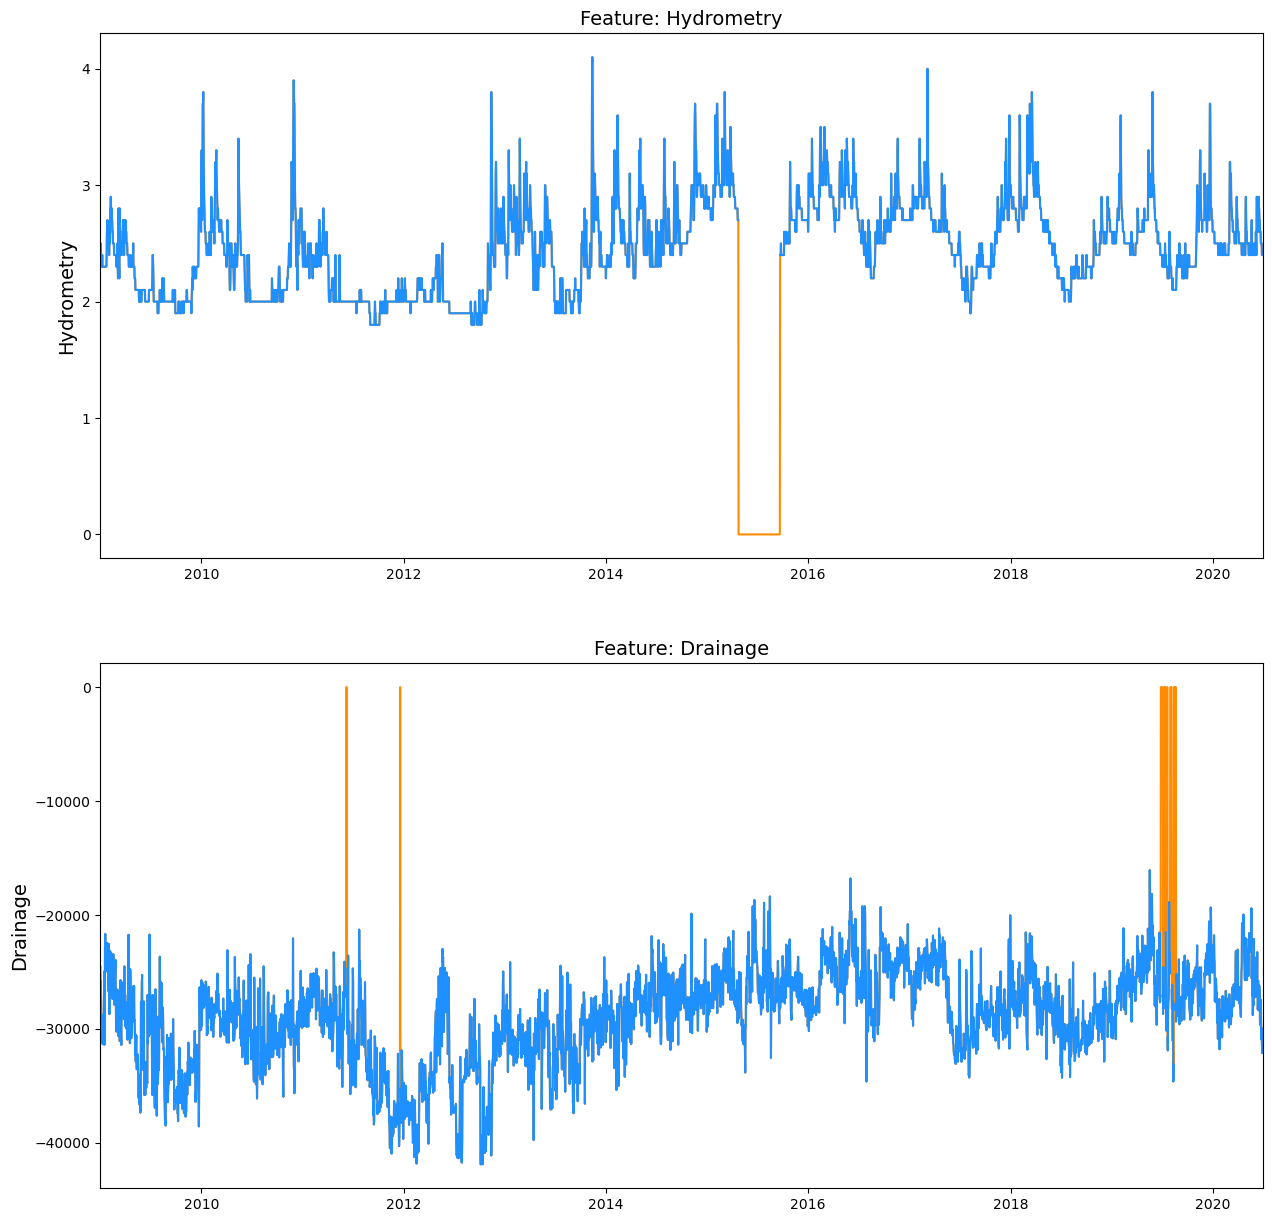

In [8]:
#发现volume有一个缺失值，实际上volume和hydrometry有许多0值都是需要处理的
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df1['Hydrometry_Fiume_Chiascio_Petrignano'].copy()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].replace(0, np.nan)

ax[0].plot(df1['Date'], old_hydrometry,color='darkorange', label='original')
ax[0].plot(df1['Date'], df1['Hydrometry_Fiume_Chiascio_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df1['Volume_C10_Petrignano'].copy()
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].replace(0, np.nan)

ax[1].plot(df1['Date'], old_drainage,color='darkorange', label='original')
ax[1].plot(df1['Date'], df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

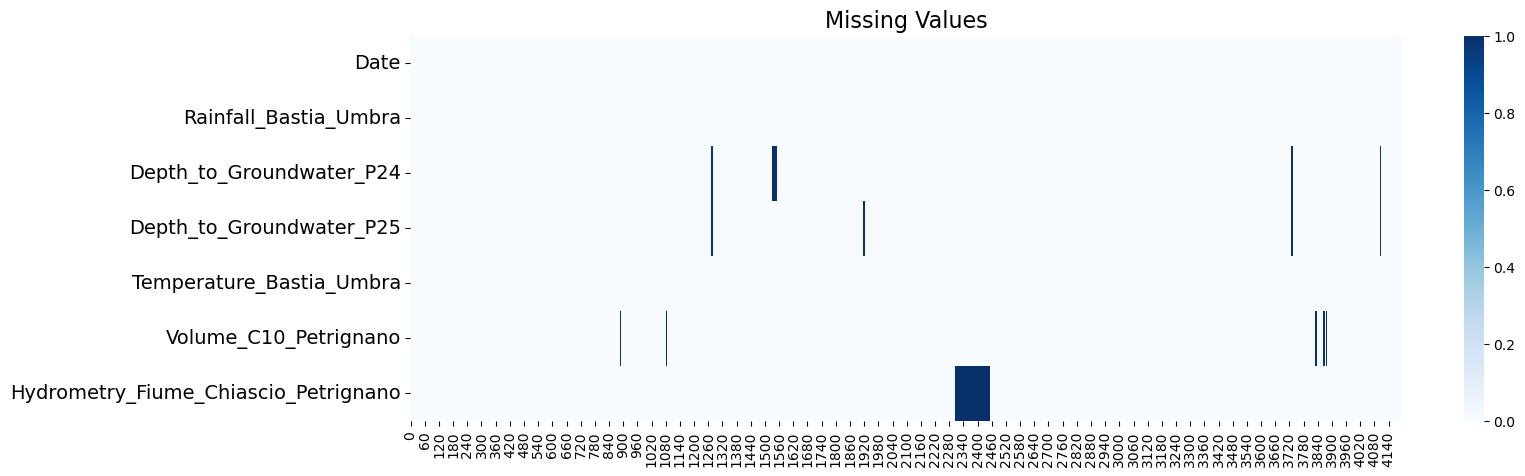

In [9]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df1.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

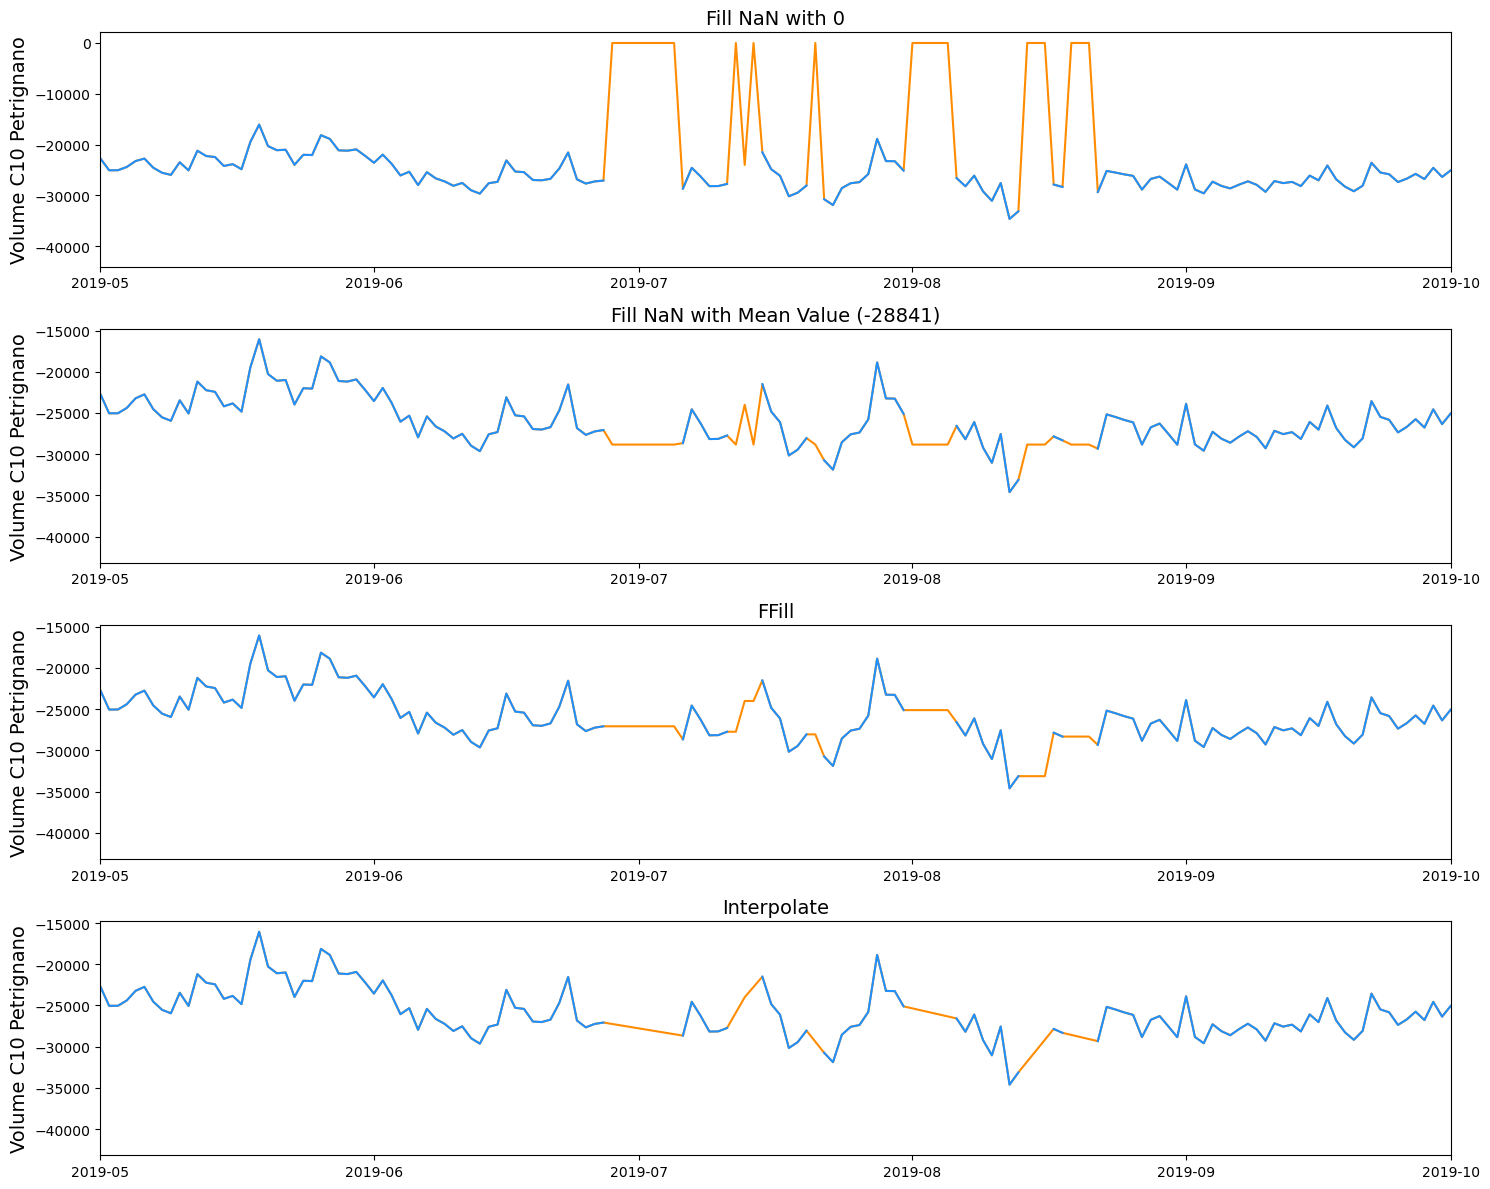

In [10]:
#使用四种不同的方式处理缺失值
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
#插入0
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(0),color='darkorange', label = 'modified')
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#插入均值
mean_drainage = df1['Volume_C10_Petrignano'].mean()
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(mean_drainage),color='darkorange', label = 'modified')
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#向前填充
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].ffill(),color='darkorange', label = 'modified')
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#线性插值
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].interpolate(),color='darkorange', label = 'modified')
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [11]:
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].interpolate()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].interpolate()
df1['Depth_to_Groundwater_P24'] = df1['Depth_to_Groundwater_P24'].interpolate()
df1['Depth_to_Groundwater_P25'] = df1['Depth_to_Groundwater_P25'].interpolate()

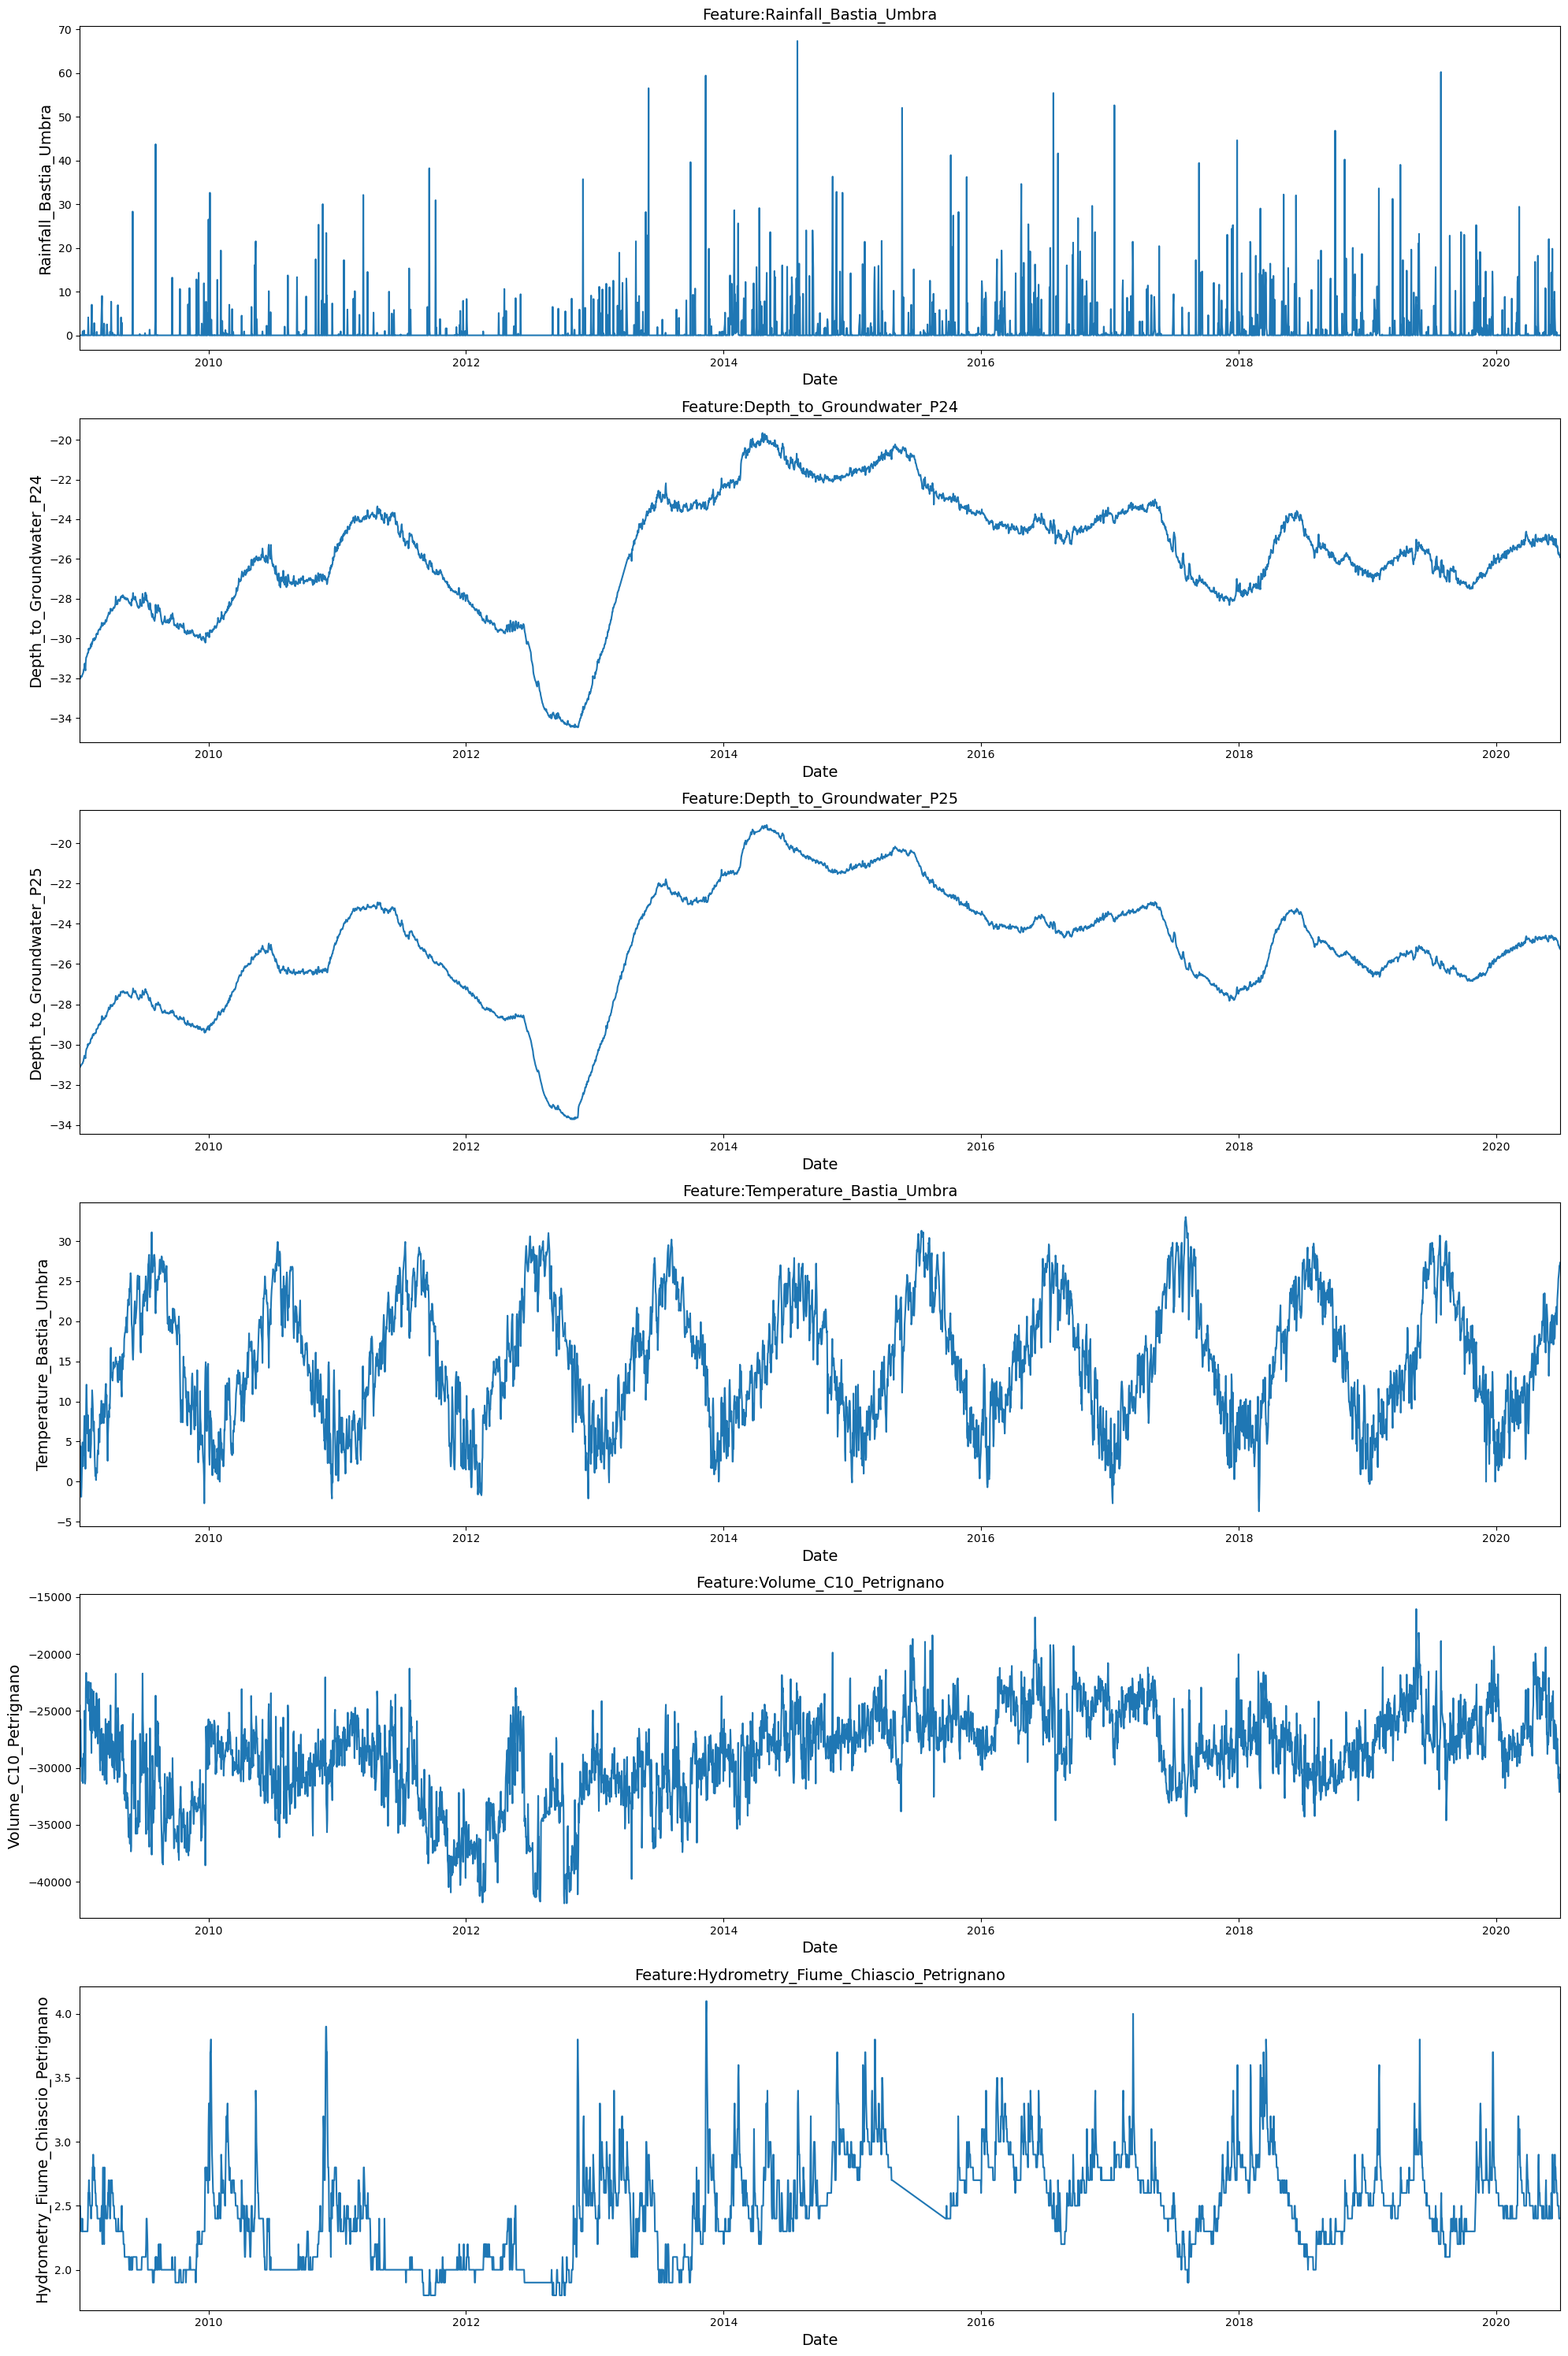

In [12]:
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column],ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

rolling_window = 7

target_columns = ['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']
feature_columns = ['Rainfall_Bastia_Umbra','Temperature_Bastia_Umbra','Volume_C10_Petrignano','Hydrometry_Fiume_Chiascio_Petrignano']
X = df1[feature_columns].values
y = df1[target_columns].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [19]:
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
print(X_train.shape)

(3353, 7, 4)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

model.summary()

Epoch 1/300
53/53 [==============================] - 5s 26ms/step - loss: 0.6928 - val_loss: 0.6639
Epoch 2/300
53/53 [==============================] - 1s 13ms/step - loss: 0.6463 - val_loss: 0.6624
Epoch 3/300
53/53 [==============================] - 1s 13ms/step - loss: 0.6225 - val_loss: 0.6277
Epoch 4/300
53/53 [==============================] - 1s 13ms/step - loss: 0.6127 - val_loss: 0.6202
Epoch 5/300
53/53 [==============================] - 1s 13ms/step - loss: 0.6047 - val_loss: 0.6147
Epoch 6/300
53/53 [==============================] - 1s 14ms/step - loss: 0.6067 - val_loss: 0.6419
Epoch 7/300
53/53 [==============================] - 1s 13ms/step - loss: 0.5895 - val_loss: 0.6631
Epoch 8/300
53/53 [==============================] - 1s 13ms/step - loss: 0.5890 - val_loss: 0.6105
Epoch 9/300
53/53 [==============================] - 1s 13ms/step - loss: 0.5776 - val_loss: 0.5928
Epoch 10/300
53/53 [==============================] - 1s 13ms/step - loss: 0.5776 - val_loss: 0.5932

In [25]:
rolling_window = 52
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
print(X_train.shape)
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

model.summary()

(3317, 52, 4)
Epoch 1/300
52/52 [==============================] - 10s 120ms/step - loss: 0.5615 - val_loss: 0.4571
Epoch 2/300
52/52 [==============================] - 5s 101ms/step - loss: 0.4093 - val_loss: 0.3899
Epoch 3/300
52/52 [==============================] - 5s 104ms/step - loss: 0.3180 - val_loss: 0.3044
Epoch 4/300
52/52 [==============================] - 5s 102ms/step - loss: 0.2635 - val_loss: 0.2382
Epoch 5/300
52/52 [==============================] - 5s 102ms/step - loss: 0.2153 - val_loss: 0.1863
Epoch 6/300
52/52 [==============================] - 5s 103ms/step - loss: 0.1626 - val_loss: 0.1359
Epoch 7/300
52/52 [==============================] - 5s 102ms/step - loss: 0.1378 - val_loss: 0.1151
Epoch 8/300
52/52 [==============================] - 5s 102ms/step - loss: 0.1084 - val_loss: 0.0929
Epoch 9/300
52/52 [==============================] - 5s 102ms/step - loss: 0.0826 - val_loss: 0.0832
Epoch 10/300
52/52 [==============================] - 5s 101ms/step - loss: 

In [26]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

26/26 [==============================] - 1s 20ms/step - loss: 0.0029
Test Loss: 0.002926147310063243


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())